<a href="https://colab.research.google.com/github/kithmiGunawardna/Hate_Speech_detection/blob/master/Hate_Speech_Detection_balanced_dataset(undersampling)_classical_ML_approches_BOW(uni_gram)_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import relevant libraraies
import pandas as pd
import numpy as np
from google.colab import drive
import re
import nltk
nltk.download('stopwords')
nltk.download('snowball_data')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to /root/nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!


 0 - hate speech 1 - offensive language 2 - neither

In [ ]:
#import dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Campus_Research/labeled_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df['tweet'] = df['tweet'].str.lower()  #convert tweets to lowerclass letters

In [ ]:
# # removing the users from the tweets
# import re
# import re

# # Assuming df['tweet'] is a Pandas Series
# df['tweet'] = df['tweet'].apply(lambda x: re.sub('@[^\s]+', '', str(x)))




In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
# import nltk

# from nltk.stem import PorterStemmer

# nltk.download('stopwords')

# from nltk.corpus import stopwords

In [ ]:
# stop_words = set(stopwords.words('english')) #to avoid similer ones we put thrm in to a set
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     words = [stemmer.stem(word) for word in text.split() if not word.lower() in stop_words]
#     return ' '.join(words)

# df['processed_text'] = df['tweet'].apply(preprocess_text)

In [ ]:
# pattern = r'[^\w\s]'
# df['processed_text'] =df['processed_text'].replace(pattern, '', regex=True)

In [ ]:
#create a function to clean the data set witch includeremove sepecial charaters , puctuations,removing stopwords

# Initialize stemmer and stop words
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))



# Initialize stemmer and stop words
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    # Split text into words after removing stopwords
    words = [word for word in text.split(' ') if word not in stopword]

    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join stemmed words back into text
    cleaned_text = " ".join(stemmed_words)

    return cleaned_text





In [ ]:
# Apply clean_text function
df.loc[:, 'tweet'] = df['tweet'].apply(clean_text)

In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean ho...
1,1,3,0,3,0,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,3,3,0,2,1,1,rt cganderson vivabas look like tranni
4,4,6,0,6,0,1,rt shenikarobert shit hear might true might f...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,yous muthafin lie coreyemanuel right tl tras...
24779,25292,3,0,1,2,2,youv gone broke wrong heart babi drove redneck...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitch tellin lie


In [ ]:
df1 =df[['class', 'tweet']]
df1


,class,tweet
0,2,rt mayasolov woman shouldnt complain clean ho...
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,1,rt cganderson vivabas look like tranni
4,1,rt shenikarobert shit hear might true might f...
...,...,...
24778,1,yous muthafin lie coreyemanuel right tl tras...
24779,2,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


 **Imbalanced dataset**

In [ ]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center',
                 bbox=dict(facecolor='red', alpha=0.8))


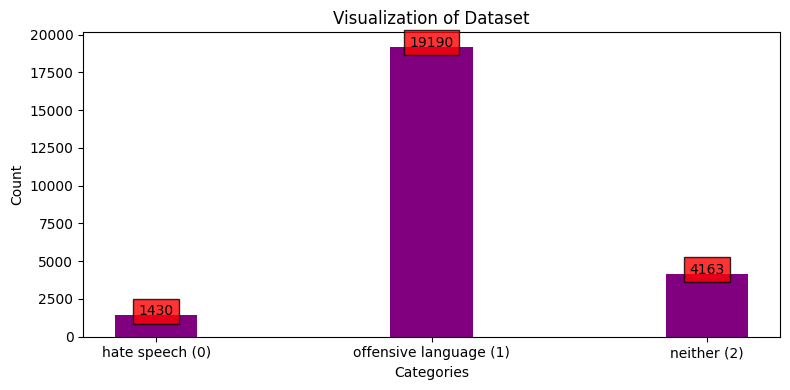

In [ ]:
category = ['hate speech (0)', 'offensive language (1)', 'neither (2)']
count = df['class'].value_counts()
value_count = [count[0], count[1], count[2]]

fig = plt.figure(figsize=(8, 4))  # Adjust the figsize for a smaller graph

plt.bar(category, value_count, color='purple', width=0.3)  # Reduce the width of the bars

addlabels(category, value_count)
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Visualization of Dataset")
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()






In [ ]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

**Balanced dataset using undersampling**

In [ ]:
#create two different dataframe of majority and minority class
df_class_1 = df[(df['class']==1)]
df_class_2 = df[(df['class']==2)]
df_class_0 = df[(df['class']==0)]
# undersample class_1 class
df_class_1_undersampled = resample(df_class_1,
                                 replace=False,    # sample with replacement
                                 n_samples= len(df_class_0), # to match majority class
                                 random_state=42)  # reproducible results
# undersample class_1 class
df_class_2_undersampled = resample(df_class_2,
                                 replace=False,    # sample with replacement
                                 n_samples= len(df_class_0), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
undersampled_df  = pd.concat([df_class_1_undersampled, df_class_2_undersampled,df_class_0])


In [ ]:
undersampled_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
22889,23369,3,0,3,0,1,everytim go cracker barrel girl great tit seat...
20565,21012,3,0,3,0,1,run nigga dont want nigga need bad bitch that ...
10780,11061,3,0,3,0,1,need girl jamaica cant fuck basic black bitch
17261,17654,3,0,3,0,1,rt shadowbeatzinc know block next week bitch
13954,14294,3,0,3,0,1,put ya hand grade bitch
...,...,...,...,...,...,...,...
24576,25084,3,2,1,0,0,guy biggest faggot omfg
24685,25197,3,2,1,0,0,one name offens kike wop kraut wetback jigaboo...
24751,25264,3,2,1,0,0,pussi ass nigga know nigga
24776,25289,3,3,0,0,0,your nigger


In [ ]:
undersampled_df ['class'].value_counts()

1    1430
2    1430
0    1430
Name: class, dtype: int64

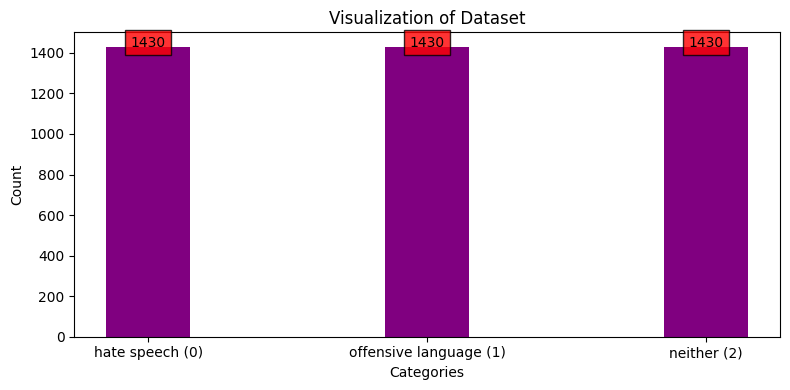

In [ ]:
category = ['hate speech (0)', 'offensive language (1)', 'neither (2)']
count = undersampled_df['class'].value_counts()
value_count = [count[0], count[1], count[2]]

fig = plt.figure(figsize=(8, 4))  # Adjust the figsize for a smaller graph

plt.bar(category, value_count, color='purple', width=0.3)  # Reduce the width of the bars

addlabels(category, value_count)
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Visualization of Dataset")
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
y = undersampled_df['class']
x = undersampled_df.tweet

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


***using bag of word uni gram method traing the models:***
     



In [ ]:
vectorizer = CountVectorizer()
x_train_vectorizer  = vectorizer.fit_transform(x_train)
vectorizer.get_feature_names_out()
x_test_vectorizer = vectorizer.transform(x_test)

***SVM model***

In [ ]:
parameters_SVM = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10] ,'gamma':('scale','float','auto')}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters_SVM)
clf.fit(x_train_vectorizer,y_train)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': ('scale', 'float', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [ ]:
print(clf.cv_results_)



{'mean_fit_time': array([7.72166300e-01, 1.27924438e+00, 1.14713860e+00, 7.65359879e-01,
       1.65772438e-03, 1.42893791e-03, 1.46684647e-03, 1.39193535e-03,
       7.30575943e-01, 1.06788521e+00, 1.07229939e+00, 1.01068897e+00,
       9.26772499e-01, 1.12743425e+00, 1.94045382e+00, 1.09765244e+00,
       1.07526779e-03, 9.05084610e-04, 8.98075104e-04, 8.86058807e-04,
       9.21367025e-01, 1.02371693e+00, 1.08744159e+00, 1.04129648e+00]), 'std_fit_time': array([2.61279343e-02, 1.67601263e-01, 1.71736610e-02, 6.82843889e-02,
       1.98483259e-04, 6.83132430e-05, 5.74681959e-05, 3.04225844e-05,
       1.15325888e-02, 2.65792093e-02, 1.02177748e-01, 2.16666785e-02,
       1.33114291e-01, 6.87123478e-03, 7.30406324e-01, 2.82523649e-01,
       1.99228705e-04, 1.03764411e-05, 8.65482430e-06, 1.91060027e-05,
       1.13516865e-01, 1.06405349e-02, 9.50904291e-02, 6.52359118e-02]), 'mean_score_time': array([0.11919985, 0.20719762, 0.1666131 , 0.14525094, 0.        ,
       0.        , 0.   

In [ ]:
df_svc = pd.DataFrame(clf.cv_results_)


In [ ]:
df_svc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.772166,0.026128,0.119200,0.003942,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.793304,0.790393,0.800292,0.787172,0.778426,0.789917,0.007196,4
1,1.279244,0.167601,0.207198,0.029517,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.794760,0.797671,0.804665,0.776968,0.791545,0.793122,0.009166,3
2,1.147139,0.017174,0.166613,0.003756,1,scale,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.669578,0.684134,0.626822,0.628280,0.698251,0.661413,0.029101,11
3,0.765360,0.068284,0.145251,0.005147,1,scale,sigmoid,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.810771,0.810771,0.806122,0.797376,0.798834,0.804775,0.005723,1
4,0.001658,0.000198,0.000000,0.000000,1,float,linear,"{'C': 1, 'gamma': 'float', 'kernel': 'linear'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
5,0.001429,0.000068,0.000000,0.000000,1,float,rbf,"{'C': 1, 'gamma': 'float', 'kernel': 'rbf'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,0.001467,0.000057,0.000000,0.000000,1,float,poly,"{'C': 1, 'gamma': 'float', 'kernel': 'poly'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
7,0.001392,0.000030,0.000000,0.000000,1,float,sigmoid,"{'C': 1, 'gamma': 'float', 'kernel': 'sigmoid'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
8,0.730576,0.011533,0.115413,0.002928,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.793304,0.790393,0.800292,0.787172,0.778426,0.789917,0.007196,4
9,1.067885,0.026579,0.220519,0.024427,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.343523,0.343523,0.344023,0.344023,0.344023,0.343823,0.000245,13


In [ ]:
df_svc[['param_C', 'param_kernel', 'params', 'mean_test_score', 'rank_test_score']]


,param_C,param_kernel,params,mean_test_score,rank_test_score
0,1,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.789917,4
1,1,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.793122,3
2,1,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.661413,11
3,1,sigmoid,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.804775,1
4,1,linear,"{'C': 1, 'gamma': 'float', 'kernel': 'linear'}",NaN,17
5,1,rbf,"{'C': 1, 'gamma': 'float', 'kernel': 'rbf'}",NaN,17
6,1,poly,"{'C': 1, 'gamma': 'float', 'kernel': 'poly'}",NaN,17
7,1,sigmoid,"{'C': 1, 'gamma': 'float', 'kernel': 'sigmoid'}",NaN,17
8,1,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.789917,4
9,1,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.343823,13


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
SVC(C=1, kernel='sigmoid')


In [ ]:
SVM_output = clf.predict(x_test_vectorizer)

<Axes: >

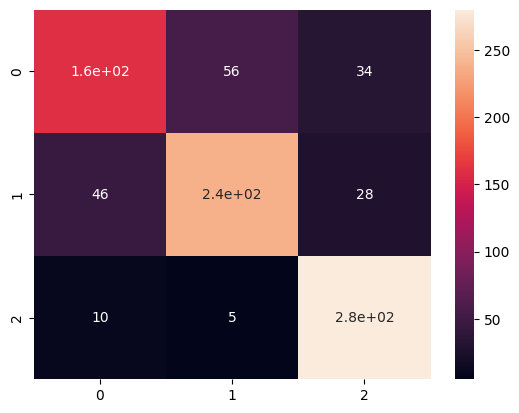

In [ ]:
y_true = y_test
y_pred = SVM_output
cm_for_SVM = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_SVM, annot=True)


In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       250
           1       0.80      0.76      0.78       313
           2       0.82      0.95      0.88       295

    accuracy                           0.79       858
   macro avg       0.79      0.78      0.78       858
weighted avg       0.79      0.79      0.79       858



***Logistic Regression model***  

In [ ]:
parameters_Logistic_regression = {'solver':('lbfgs', 'liblinear','newton-cg') ,'C':[1.0,10.0],'penalty':('l1','l2','elasticnet')}
Logistic_Regression = LogisticRegression()
model = GridSearchCV(Logistic_Regression,parameters_Logistic_regression)
model.fit(x_train_vectorizer,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 10.0],
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg')})

In [ ]:
print(model.cv_results_)

In [ ]:
df_logistic_regression = pd.DataFrame(model.cv_results_)

In [ ]:
df_logistic_regression

In [ ]:
df_logistic_regression[['param_C'	,'param_penalty'	,'param_solver', 'params', 'mean_test_score', 'rank_test_score']]

,param_C,param_penalty,param_solver,params,mean_test_score,rank_test_score
0,1.0,l1,lbfgs,"{'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,9
1,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.808564,1
2,1.0,l1,newton-cg,"{'C': 1.0, 'penalty': 'l1', 'solver': 'newton-...",NaN,9
3,1.0,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.803606,3
4,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.804189,2
5,1.0,l2,newton-cg,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.803606,3
6,1.0,elasticnet,lbfgs,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
7,1.0,elasticnet,liblinear,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
8,1.0,elasticnet,newton-cg,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
9,10.0,l1,lbfgs,"{'C': 10.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,9


In [ ]:
print(model.best_params_)
print(model.best_estimator_)

In [ ]:
logisticregresision_output = model.predict(x_test_vectorizer)


In [ ]:
y_true = y_test
y_pred = logisticregresision_output
cm_for_LogisticRegression = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_LogisticRegression, annot=True)


In [ ]:
print(classification_report(y_true, logisticregresision_output,labels=[0,1,2]))

***Decision Tree Classifier***

In [ ]:
parameters_decision_tree_classifier = {'criterion':('gini', 'entropy','log_loss'), 'splitter':('best','random') ,'max_features':('sqrt','log2'),'max_depth' : [3,2,100,1000,10000],'min_samples_split':[2,20,30,40],'random_state':[0,42,123]}
Dession_tree_classifiar= DecisionTreeClassifier()
clf = GridSearchCV(Dession_tree_classifiar,parameters_decision_tree_classifier )
clf.fit(x_train_vectorizer,y_train)


In [ ]:
print(clf.cv_results_)

In [ ]:
df_dicision_tree = pd.DataFrame(clf.cv_results_)


In [ ]:
df_dicision_tree

In [ ]:
df_dicision_tree[['param_criterion', 'param_max_depth','param_max_features','param_min_samples_split','param_splitter', 'params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
decision_tree_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred =decision_tree_output
cm_for_decision_tree = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_decision_tree, annot=True)

In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

***passive Aggressive***

In [ ]:
parameters_passive_aggrasive ={'C':[1.0,10.0],'max_iter':[10,100,1000],'early_stopping':(True,False),'shuffle':(True,False),'loss':('str','hinge'),'n_jobs':[1,10,100,1000],'random_state':[0,42,123]}
passive_aggrasive = PassiveAggressiveClassifier()
clf = GridSearchCV(passive_aggrasive,parameters_passive_aggrasive )
clf.fit(x_train_vectorizer,y_train)

In [ ]:
print(clf.cv_results_)

In [ ]:
df_passive_aggrasive = pd.DataFrame(clf.cv_results_)


In [ ]:
df_passive_aggrasive

In [ ]:
df_passive_aggrasive[['param_C', 'param_early_stopping','param_loss','param_max_iter','param_n_jobs','param_random_state'	,'param_shuffle', 'params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
passive_aggressive_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred = passive_aggressive_output
cm_for_passive_aggressive_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_passive_aggressive_output, annot=True)

In [ ]:
print(classification_report(y_true,passive_aggressive_output,labels=[0,1,2]))

***Naive Bayes***

In [ ]:
parameters_Naive_Bayes ={'alpha':[1.0,10.0,100.0,1000],'fit_prior':(True,False),'class_prior':[[0.2, 0.5,0.9]]}
Naive_Bayes = MultinomialNB()
clf = GridSearchCV(estimator=Naive_Bayes, param_grid=parameters_Naive_Bayes )
# Fit the model using dense data
clf.fit( x_train_vectorizer, y_train)

In [ ]:
print(clf.cv_results_)

In [ ]:
df_navie_bayes = pd.DataFrame(clf.cv_results_)

In [ ]:
df_navie_bayes

In [ ]:
df_navie_bayes[['param_alpha'	,'param_class_prior','param_fit_prior'	, 'params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
naive_bayes_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred = naive_bayes_output
cm_for_naive_bayes_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_naive_bayes_output, annot=True)

In [ ]:
print(classification_report(y_true,naive_bayes_output,labels=[0,1,2]))

***KNN model***

In [ ]:
parameters_KNN = {'n_neighbors' : [2,3,5], 'algorithm' : ('ball_tree', 'kd_tree'), 'leaf_size' : [10,30 ,50], 'p':[1,2,3] ,'n_jobs' : [10,100,1000] }
KNN = KNeighborsClassifier()
neigh =GridSearchCV(KNN , parameters_KNN )
neigh.fit(x_train_vectorizer,y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree'),
                         'leaf_size': [10, 30, 50], 'n_jobs': [10, 100, 1000],
                         'n_neighbors': [2, 3, 5], 'p': [1, 2, 3]})

In [ ]:
print(neigh.cv_results_)

{'mean_fit_time': array([0.00490999, 0.00395584, 0.00290709, 0.00408592, 0.00452328,
       0.00286226, 0.00381083, 0.00386419, 0.00304489, 0.00411878,
       0.00403676, 0.00286288, 0.00356307, 0.0037601 , 0.00457053,
       0.00443921, 0.00388651, 0.00277185, 0.00372028, 0.00394101,
       0.00313196, 0.00444117, 0.00415854, 0.00286574, 0.00508957,
       0.00442138, 0.00357032, 0.00408373, 0.00434279, 0.00326233,
       0.00392041, 0.00466008, 0.0028738 , 0.00387297, 0.0040319 ,
       0.00319166, 0.00444717, 0.00376263, 0.00470371, 0.00426817,
       0.00438461, 0.00305634, 0.00389071, 0.00507693, 0.00362444,
       0.00482059, 0.00435781, 0.00475826, 0.00419731, 0.00381918,
       0.00298481, 0.00506272, 0.00573182, 0.00301318, 0.00415416,
       0.00378647, 0.00449767, 0.00407338, 0.00439038, 0.00301957,
       0.00406852, 0.00404849, 0.00329885, 0.00373626, 0.00405498,
       0.00300317, 0.00400839, 0.00434628, 0.00281954, 0.00423665,
       0.00382791, 0.00313892, 0.00398498, 0

In [ ]:
df_KNN = pd.DataFrame(neigh.cv_results_)

In [ ]:
df_KNN

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_jobs,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004910,0.001198,6.704633,0.561845,ball_tree,10,10,2,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.813162,0.766456,0.769231,0.777301,0.775284,0.780287,0.016901,73
1,0.003956,0.000612,2.950605,0.294722,ball_tree,10,10,2,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.808875,0.767465,0.768474,0.777049,0.774275,0.779228,0.015246,91
2,0.002907,0.000143,0.000000,0.000000,ball_tree,10,10,2,3,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
3,0.004086,0.000786,6.756895,0.412944,ball_tree,10,10,3,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.842158,0.821438,0.838840,0.837831,0.834805,0.835014,0.007183,37
4,0.004523,0.001419,3.092411,0.210842,ball_tree,10,10,3,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.839637,0.818663,0.838335,0.837831,0.834552,0.833804,0.007753,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.004316,0.000689,6.312264,0.692162,kd_tree,50,1000,3,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.839637,0.818663,0.838335,0.837831,0.834552,0.833804,0.007753,55
158,0.003107,0.000172,0.000000,0.000000,kd_tree,50,1000,3,3,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
159,0.004158,0.000622,10.676915,0.751608,kd_tree,50,1000,5,1,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.847453,0.829760,0.848928,0.836066,0.826986,0.837839,0.008962,1
160,0.004549,0.001048,6.823376,0.903000,kd_tree,50,1000,5,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.844428,0.827238,0.844388,0.832787,0.831526,0.836073,0.007049,19


In [ ]:
df_KNN[['param_algorithm'	,'param_leaf_size',	'param_n_jobs'	,'param_n_neighbors'	,'param_p','params', 'mean_test_score', 'rank_test_score']]

,param_algorithm,param_leaf_size,param_n_jobs,param_n_neighbors,param_p,params,mean_test_score,rank_test_score
0,ball_tree,10,10,2,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.780287,73
1,ball_tree,10,10,2,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.779228,91
2,ball_tree,10,10,2,3,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",NaN,109
3,ball_tree,10,10,3,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.835014,37
4,ball_tree,10,10,3,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.833804,55
...,...,...,...,...,...,...,...,...
157,kd_tree,50,1000,3,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.833804,55
158,kd_tree,50,1000,3,3,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",NaN,109
159,kd_tree,50,1000,5,1,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.837839,1
160,kd_tree,50,1000,5,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.836073,19


In [ ]:
print(neigh.best_params_)
print(neigh.best_estimator_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_jobs': 10, 'n_neighbors': 5, 'p': 1}
KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_jobs=10, p=1)


In [ ]:
KNN_output = neigh.predict(x_test_vectorizer)

<Axes: >

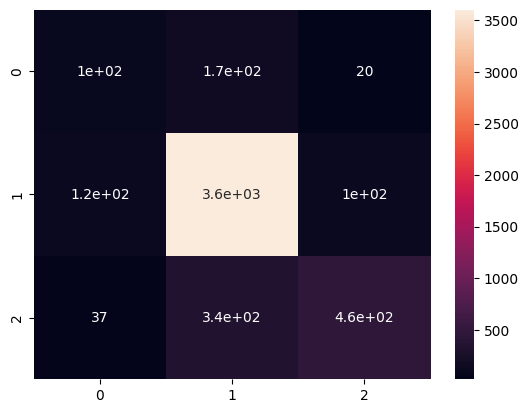

In [ ]:
y_true = y_test
y_pred = KNN_output
cm_for_KNN_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_KNN_output, annot=True)

In [ ]:
print(classification_report(y_true,KNN_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.38      0.34      0.36       290
           1       0.88      0.94      0.91      3832
           2       0.79      0.55      0.65       835

    accuracy                           0.84      4957
   macro avg       0.68      0.61      0.64      4957
weighted avg       0.83      0.84      0.83      4957



***Random Forest***

In [ ]:
parameters_Random_forest ={'max_depth': [3,2,10,100,1000], 'random_state' : [0,42,123] ,'n_estimators' :[10,100,1000], 'criterion' : ('gini', 'entropy', 'log_loss') ,'min_samples_split': [2,20,30,40] , 'max_features': ('sqrt','log2',None),'bootstrap':(True,False),'n_jobs':[10,100,1000]}
Random_Forest = RandomForestClassifier()
clf =GridSearchCV(Random_Forest,parameters_Random_forest )
clf.fit(x_train_vectorizer,y_train)

In [ ]:
print(clf.cv_results_)

In [ ]:
df_Random_Forest = pd.DataFrame(clf.cv_results_)

In [ ]:
df_Random_Forest

In [ ]:
df_Random_Forest[['params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
Random_forest_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred =Random_forest_output
cm_for_Random_forest = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_Random_forest, annot=True)

In [ ]:
print(classification_report(y_true,Random_forest_output,labels=[0,1,2]))